<a href="https://colab.research.google.com/github/Imran0897/Flight-Price-Prediction_ML_Model/blob/main/Flight_Price_Prediction_ML_Model%20with%20Hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset

1. Since data is in form of excel file we have to use pandas read_csv to load the data
2. After loading  it is important to check null values in a column or a row
3. if it is present then following can be done,
  a. Filling NaN values with mean or median or mode using fillna() method
  b. Imputing data using Imputation method in sklearn
  c. If there are less NaN values then we can drop those indexes as well.
4. Describe data --> which can give statistical analysis

In [147]:
#importing data

df  = pd.read_excel(r"/content/drive/MyDrive/Practice/Flight Price Prediction/Data_Train.xlsx",sheet_name='Sheet1')

In [148]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [150]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [151]:
df.info()    #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [152]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning

In [153]:
#finding the null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [154]:
# We observe 2 missing values,so we can directly drop these as these are very less

df.dropna(inplace = True)

In [155]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [156]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [157]:
# The data type of Date_of_journey,Arrival_Time and Dep_Time is object so we convert it into date and time for proper prediction.

In [158]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [159]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [160]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [161]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-06 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-06 05:50:00,2023-04-06 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-06 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-04-06 18:05:00,2023-04-06 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-04-06 16:50:00,2023-04-06 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-04-06 19:55:00,2023-04-06 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-04-06 20:45:00,2023-04-06 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-04-06 08:20:00,2023-04-06 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-04-06 11:30:00,2023-04-06 14:10:00,2h 40m,non-stop,No info,12648


In [162]:
df['journey_day']=df['Date_of_Journey'].dt.day

In [163]:
df['journey_month']=df['Date_of_Journey'].dt.month

In [164]:
df['journey_week']=df['Date_of_Journey'].dt.isocalendar().week

In [165]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-04-06 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-06 05:50:00,2023-04-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-06 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-04-06 18:05:00,2023-04-06 23:30:00,5h 25m,1 stop,No info,6218,5,12,49
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-04-06 16:50:00,2023-04-06 21:35:00,4h 45m,1 stop,No info,13302,3,1,1


In [166]:
df.drop(columns='Date_of_Journey',inplace = True)

In [167]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-04-06 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,12
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-04-06 05:50:00,2023-04-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-04-06 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,36
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-04-06 18:05:00,2023-04-06 23:30:00,5h 25m,1 stop,No info,6218,5,12,49
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-04-06 16:50:00,2023-04-06 21:35:00,4h 45m,1 stop,No info,13302,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2023-04-06 19:55:00,2023-04-06 22:25:00,2h 30m,non-stop,No info,4107,4,9,36
10679,Air India,Kolkata,Banglore,CCU → BLR,2023-04-06 20:45:00,2023-04-06 23:20:00,2h 35m,non-stop,No info,4145,27,4,17
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2023-04-06 08:20:00,2023-04-06 11:20:00,3h,non-stop,No info,7229,27,4,17
10681,Vistara,Banglore,New Delhi,BLR → DEL,2023-04-06 11:30:00,2023-04-06 14:10:00,2h 40m,non-stop,No info,12648,3,1,1


In [168]:
#Extracting hour and minutes from Dep_time and Arrival_time

In [169]:
df['Dep_Time_hour'] = df['Dep_Time'].dt.hour

In [170]:
df['Dep_Time_min'] = df['Dep_Time'].dt.minute

In [171]:
df['Arrival_Time_hour'] = df['Arrival_Time'].dt.hour

In [172]:
df['Arrival_Time_min'] = df['Arrival_Time'].dt.minute

In [173]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace = True)

In [174]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,36,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35


In [175]:
 dur = list(df['Duration'])

In [176]:
for i in range(len(dur)):
    if len(dur[i].split(" "))==2:
        pass
    else:
        if 'h' in dur[i]:
            dur[i]=dur[i]+" 0m"
        else:
            dur[i] = "0h "+dur[i]

In [177]:
df['Duration']=dur

In [178]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,36,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35


In [179]:
def hour(x):
    return x.split(" ")[0][0:-1]
def minutes(x):
    return x.split(" ")[1][0:-1]

In [180]:
df['dur_hour'] = df['Duration'].apply(hour)

In [181]:
df['dur_min'] = df['Duration'].apply(minutes)

In [182]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,36,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,49,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,1,16,50,21,35,4,45


In [183]:
df.drop(columns="Duration",inplace = True)

In [184]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,12,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,36,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,49,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,36,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,17,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,17,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,1,11,30,14,10,2,40


In [185]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
journey_week         UInt32
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [186]:
df['dur_hour'] = df['dur_hour'].astype(int)

In [187]:
df['dur_min'] = df['dur_min'].astype(int)

In [188]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
journey_week         UInt32
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int64
dur_min               int64
dtype: object

# handlind categorical data

In [189]:
# We are using two Encoding technique to convert Categorical Data into Some numeric format

#Nominal data-- Data that are not in any order --> one hot encoding
#ordinal data-- Data that are in order --> labelEncoder

In [190]:
cat_col = [i for i in df.columns if df[i].dtype == 'object']

In [191]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [192]:
cont_col = [i for i in df.columns if df[i].dtypes != object]

In [193]:
categorical = df[cat_col]

In [194]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [195]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [196]:
#Airline vs Price Analysis

<Axes: xlabel='Airline', ylabel='Price'>

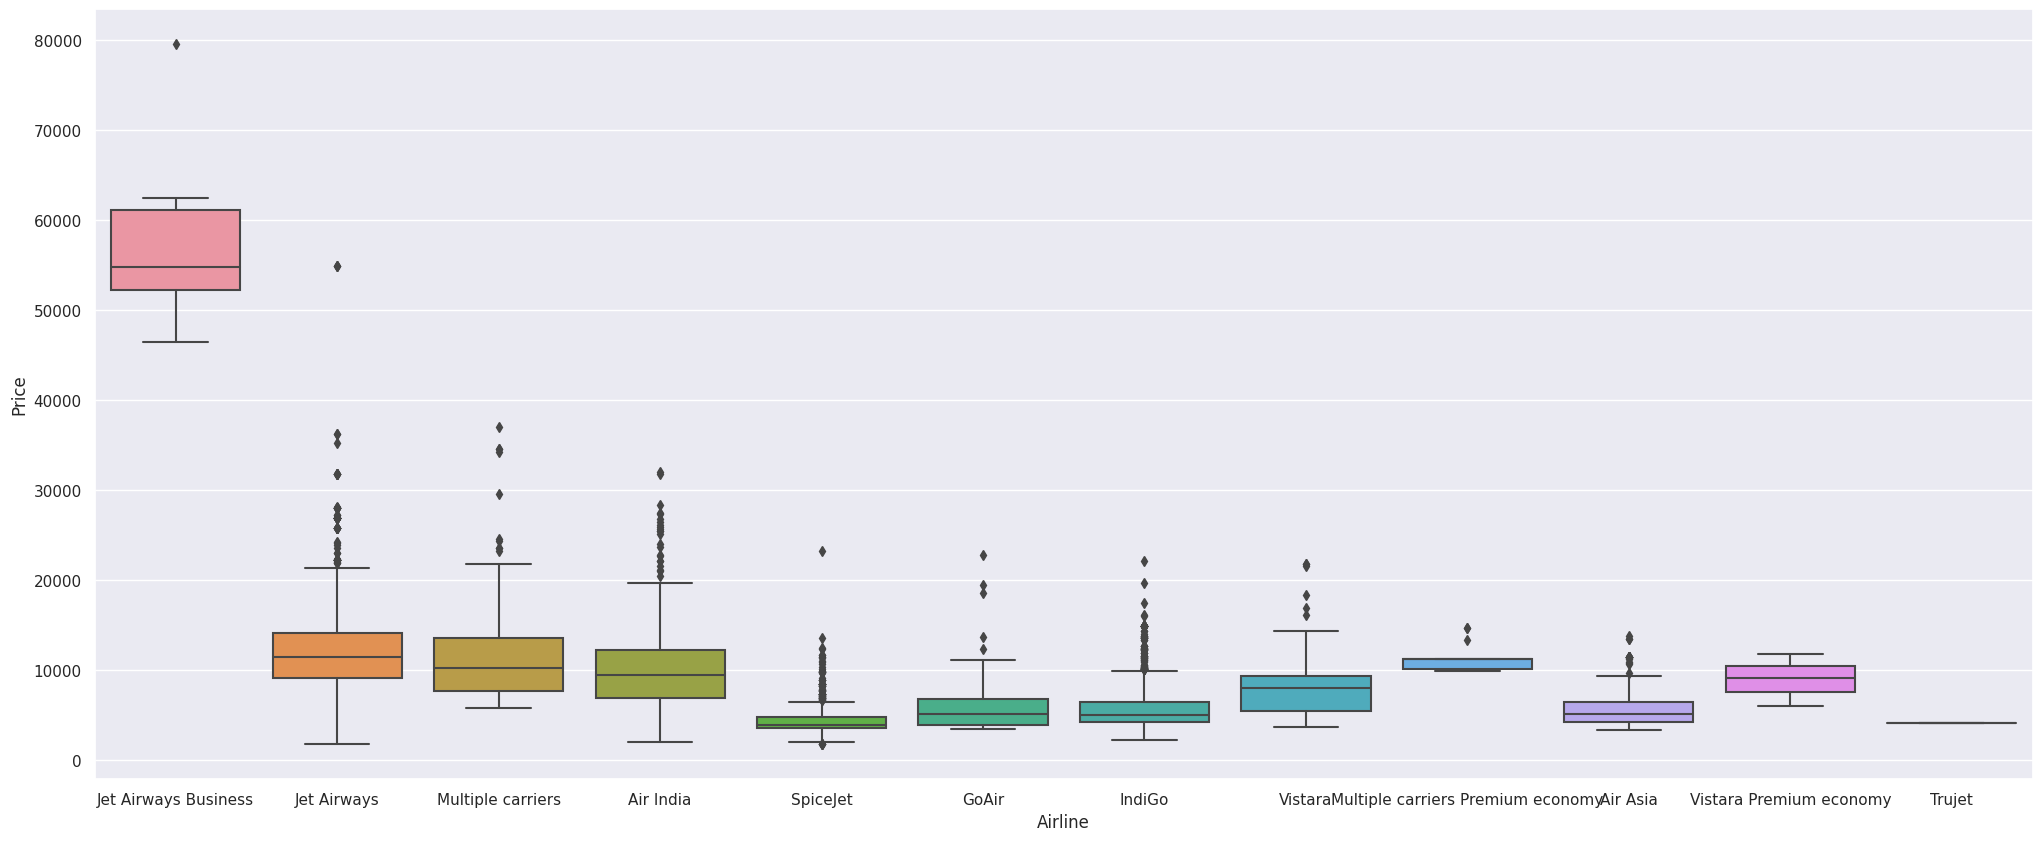

In [197]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'Airline',y = 'Price' , data = df.sort_values('Price',ascending=False))

In [198]:
# perform Total_Stops vs Price Analysis

<Axes: xlabel='Total_Stops', ylabel='Price'>

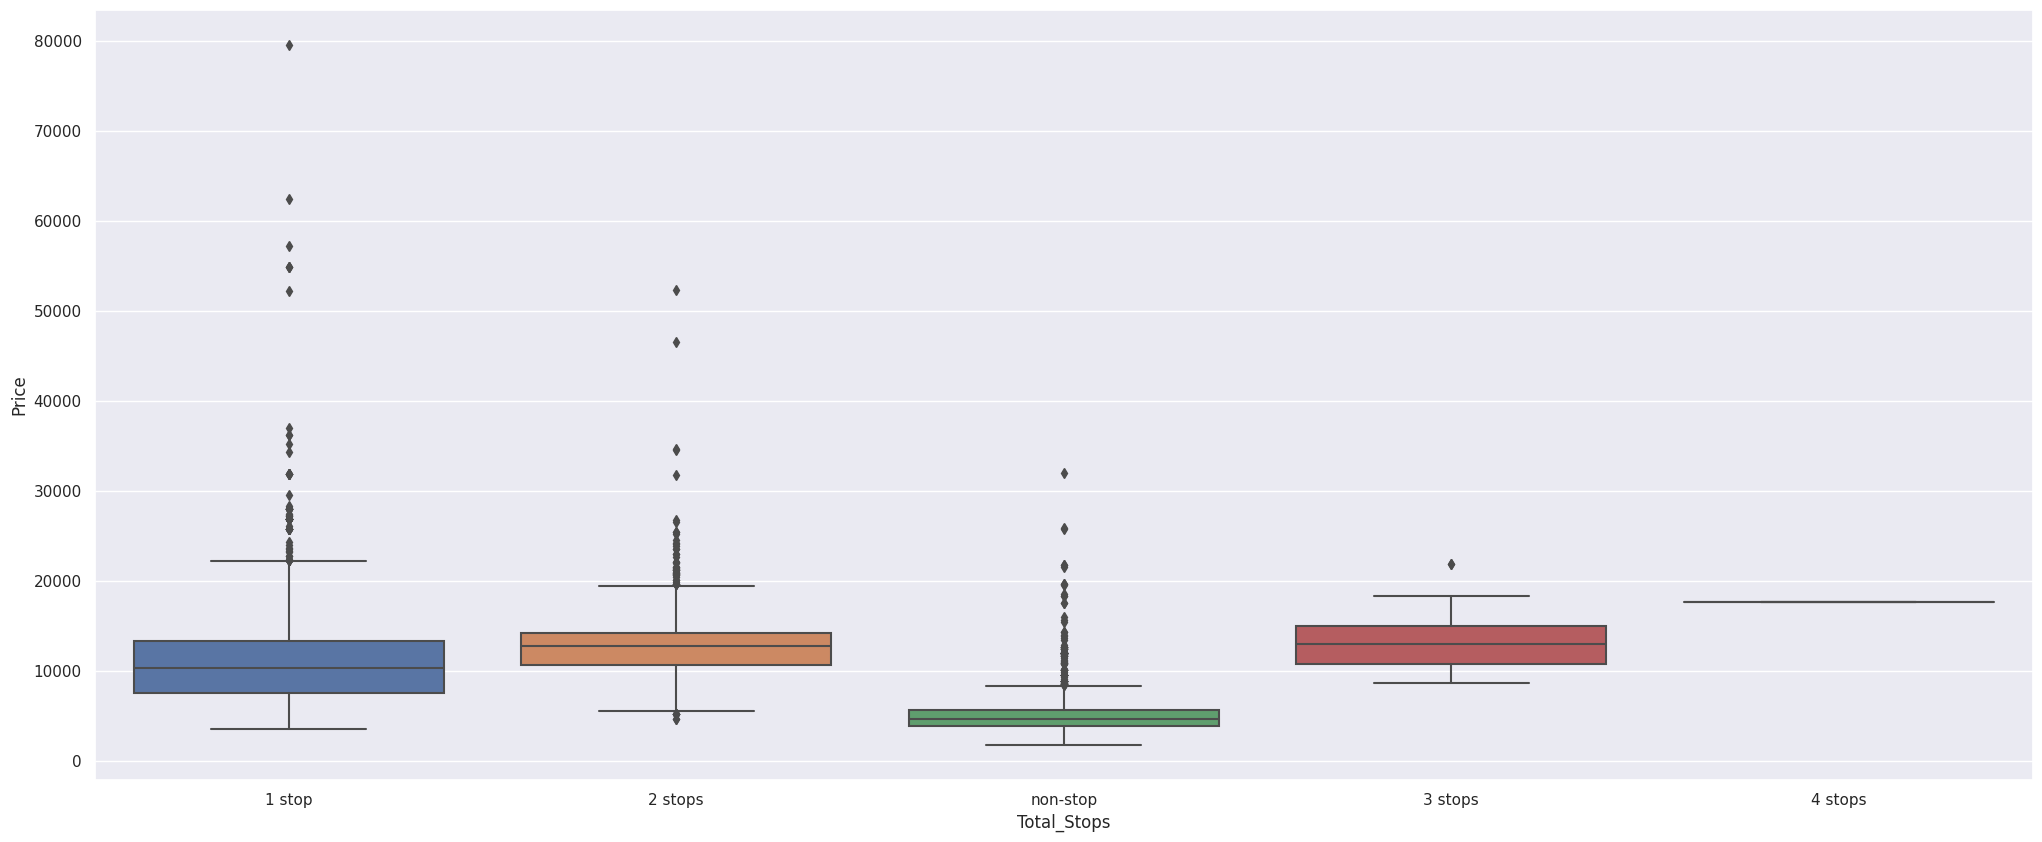

In [199]:
plt.figure(figsize = (25,10))
sns.boxplot(x = 'Total_Stops',y = 'Price',data = df.sort_values('Price',ascending=False))

In [200]:
# As Airline is nominal categorical data we will perform OneHotEncoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

In [201]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [202]:
 df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 3500x3000 with 0 Axes>

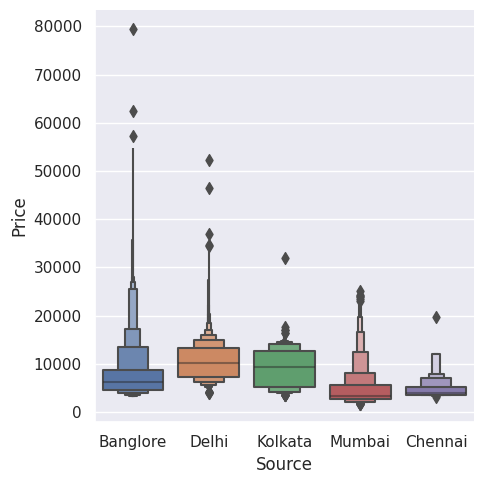

In [203]:
plt.figure(figsize = (35,30))
sns.catplot(x = 'Source',y = 'Price',data = df.sort_values('Price',ascending=False),kind = 'boxen')

In [204]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

In [205]:
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [206]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

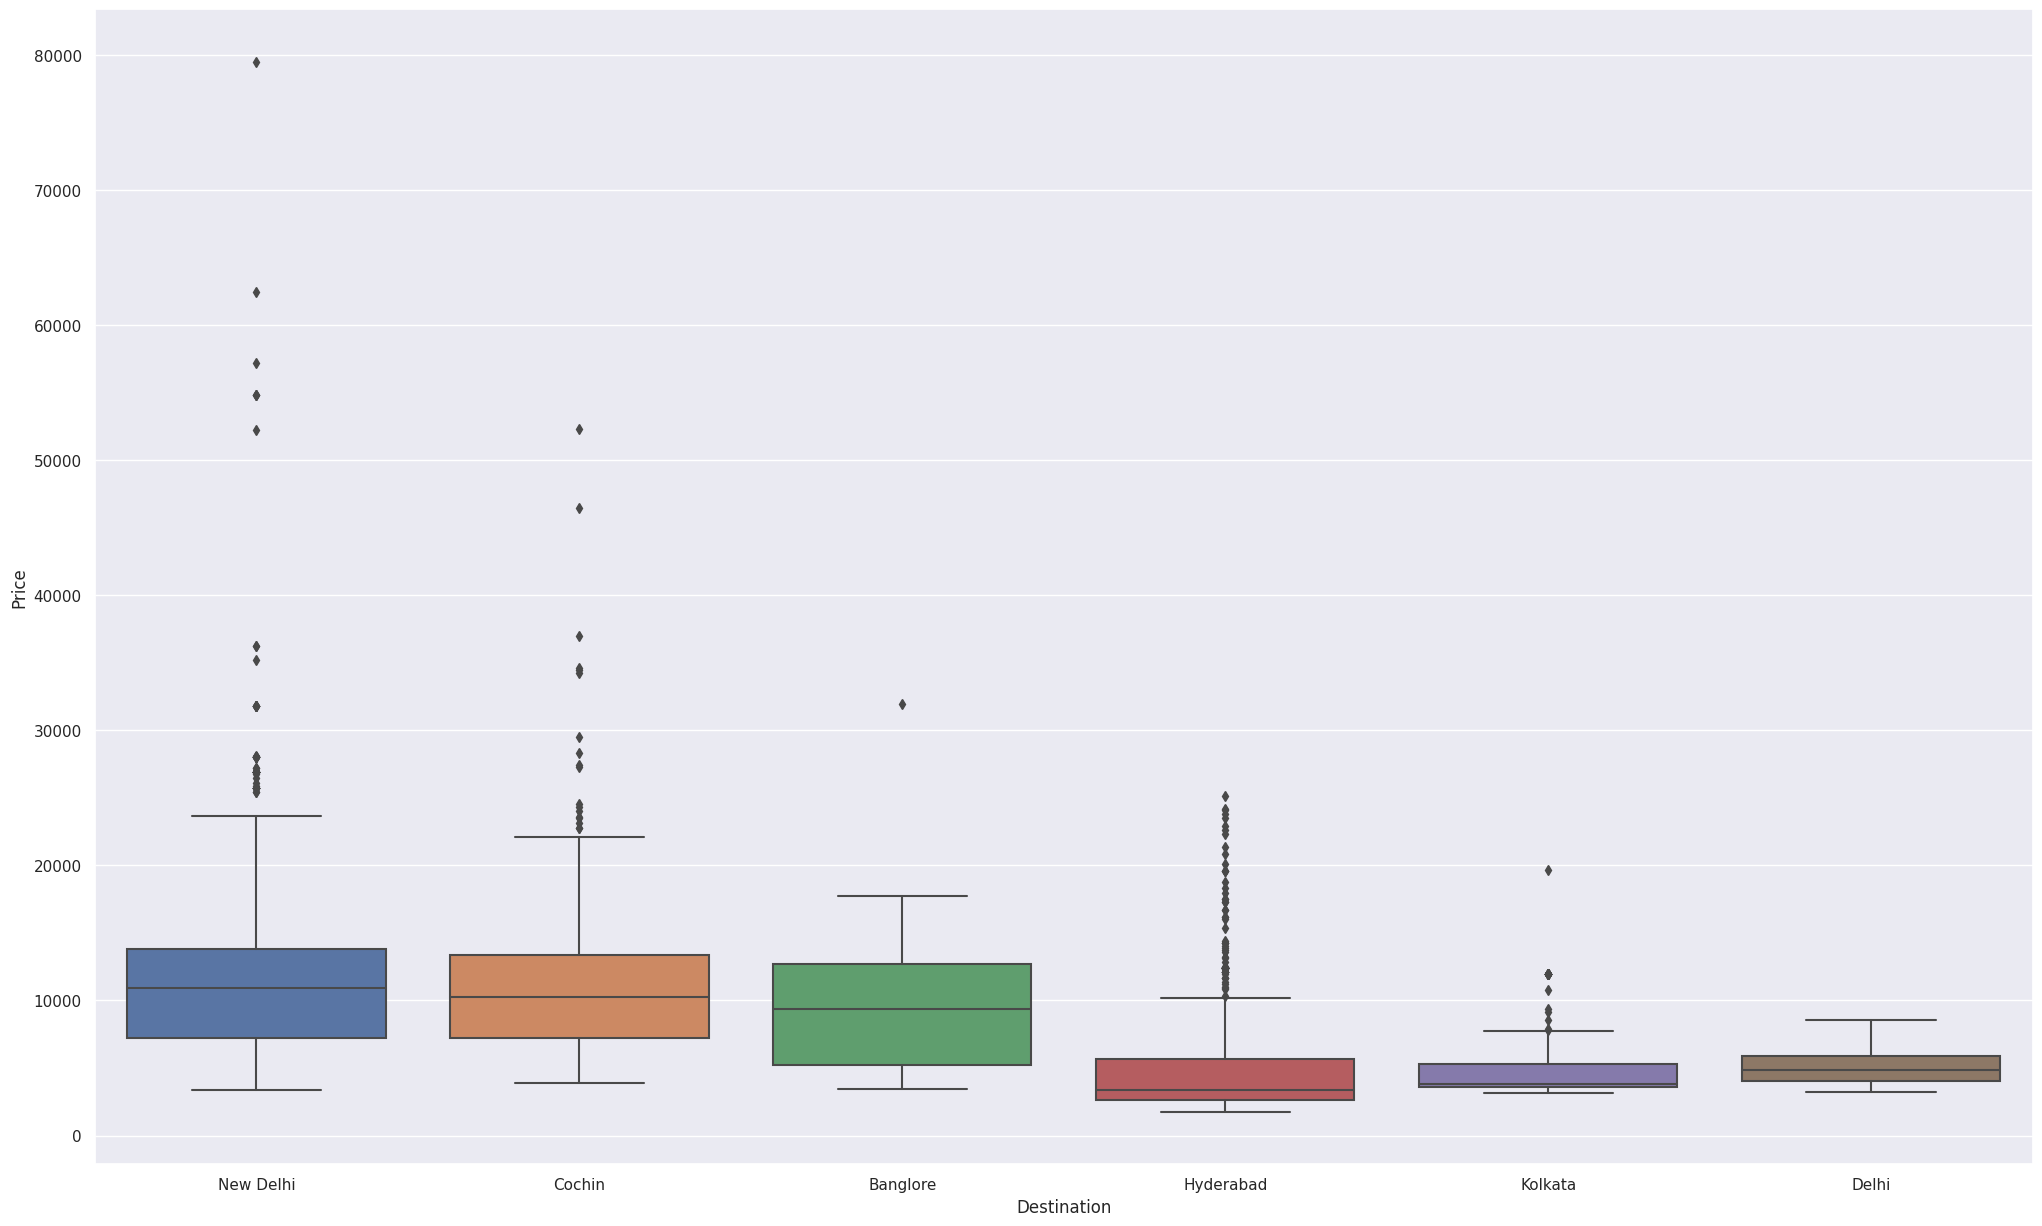

In [207]:
plt.figure(figsize = (25,15))
sns.boxplot(x = 'Destination',y = 'Price',data = df.sort_values('Price',ascending=False))

In [208]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

In [209]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [210]:
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [211]:
categorical['Route1']=categorical['Route'].str.split("→").str[0]
categorical['Route2']=categorical['Route'].str.split("→").str[1]
categorical['Route3']=categorical['Route'].str.split("→").str[2]
categorical['Route4']=categorical['Route'].str.split("→").str[3]
categorical['Route5']=categorical['Route'].str.split("→").str[4]

<ipython-input-211-9dc415e9ab83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split("→").str[0]
<ipython-input-211-9dc415e9ab83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split("→").str[1]
<ipython-input-211-9dc415e9ab83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [212]:
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [213]:
categorical.drop(columns='Route',inplace=True)

<ipython-input-213-0e73a2afc05a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop(columns='Route',inplace=True)


In [214]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [215]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace = True)

<ipython-input-215-68dce8c22aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace = True)


In [216]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [217]:
for i in categorical.columns:
    print('{} has total {} categoreies'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categoreies
Source has total 5 categoreies
Destination has total 6 categoreies
Total_Stops has total 5 categoreies
Additional_Info has total 10 categoreies
Route1 has total 5 categoreies
Route2 has total 45 categoreies
Route3 has total 30 categoreies
Route4 has total 14 categoreies
Route5 has total 6 categoreies


In [218]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None


In [219]:
# Applying label encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [220]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

<ipython-input-220-47e8f22a248c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
<ipython-input-220-47e8f22a248c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
<ipython-input-220-47e8f22a248c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [221]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [222]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [223]:
dict = {'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-223-b9714d10f5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [224]:
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,No info,0,13,29,13,5


In [225]:
categorical.drop(columns=['Airline','Source','Destination','Additional_Info'],inplace = True)

<ipython-input-225-98799815855f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop(columns=['Airline','Source','Destination','Additional_Info'],inplace = True)


In [226]:
categorical

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5
...,...,...,...,...,...,...
10678,0,2,5,29,13,5
10679,0,2,5,29,13,5
10680,0,0,13,29,13,5
10681,0,0,13,29,13,5


In [227]:
dff = pd.concat([categorical,Airline,Source,Destination,df[cont_col]], axis=1)

In [228]:
dff

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Price,journey_day,journey_month,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,12,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,36,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,49,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,4107,4,9,36,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,4145,27,4,17,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,7229,27,4,17,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,12648,3,1,1,11,30,14,10,2,40


# Check for Outliers

In [229]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax = ax1)
    sns.boxplot(data[col],ax=ax2)

<ipython-input-229-fee80d13c292>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax = ax1)


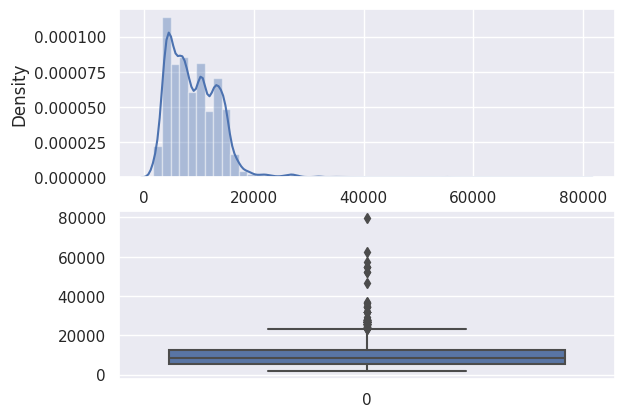

In [230]:
plot(dff,'Price')

In [231]:
dff['Price']=np.where(dff['Price']>=40000,dff['Price'].median(),dff['Price'])

<ipython-input-229-fee80d13c292>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax = ax1)


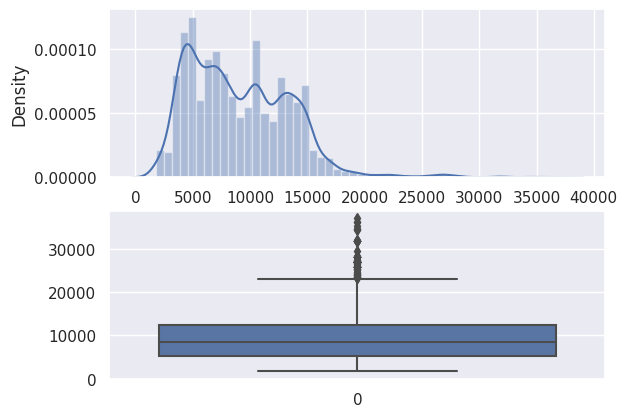

In [232]:
plot(dff,'Price')

In [233]:
#Seperate the Dataset in X and Y columns

In [234]:
X = dff.drop(columns='Price')

In [235]:
Y = dff['Price']

# Feature selection

In [236]:
# It is about finding the best feature and having good relation with independent variable issue of dimensionality reduction reduces.

In [237]:
# Finds correclation between Independent and dependent attributes

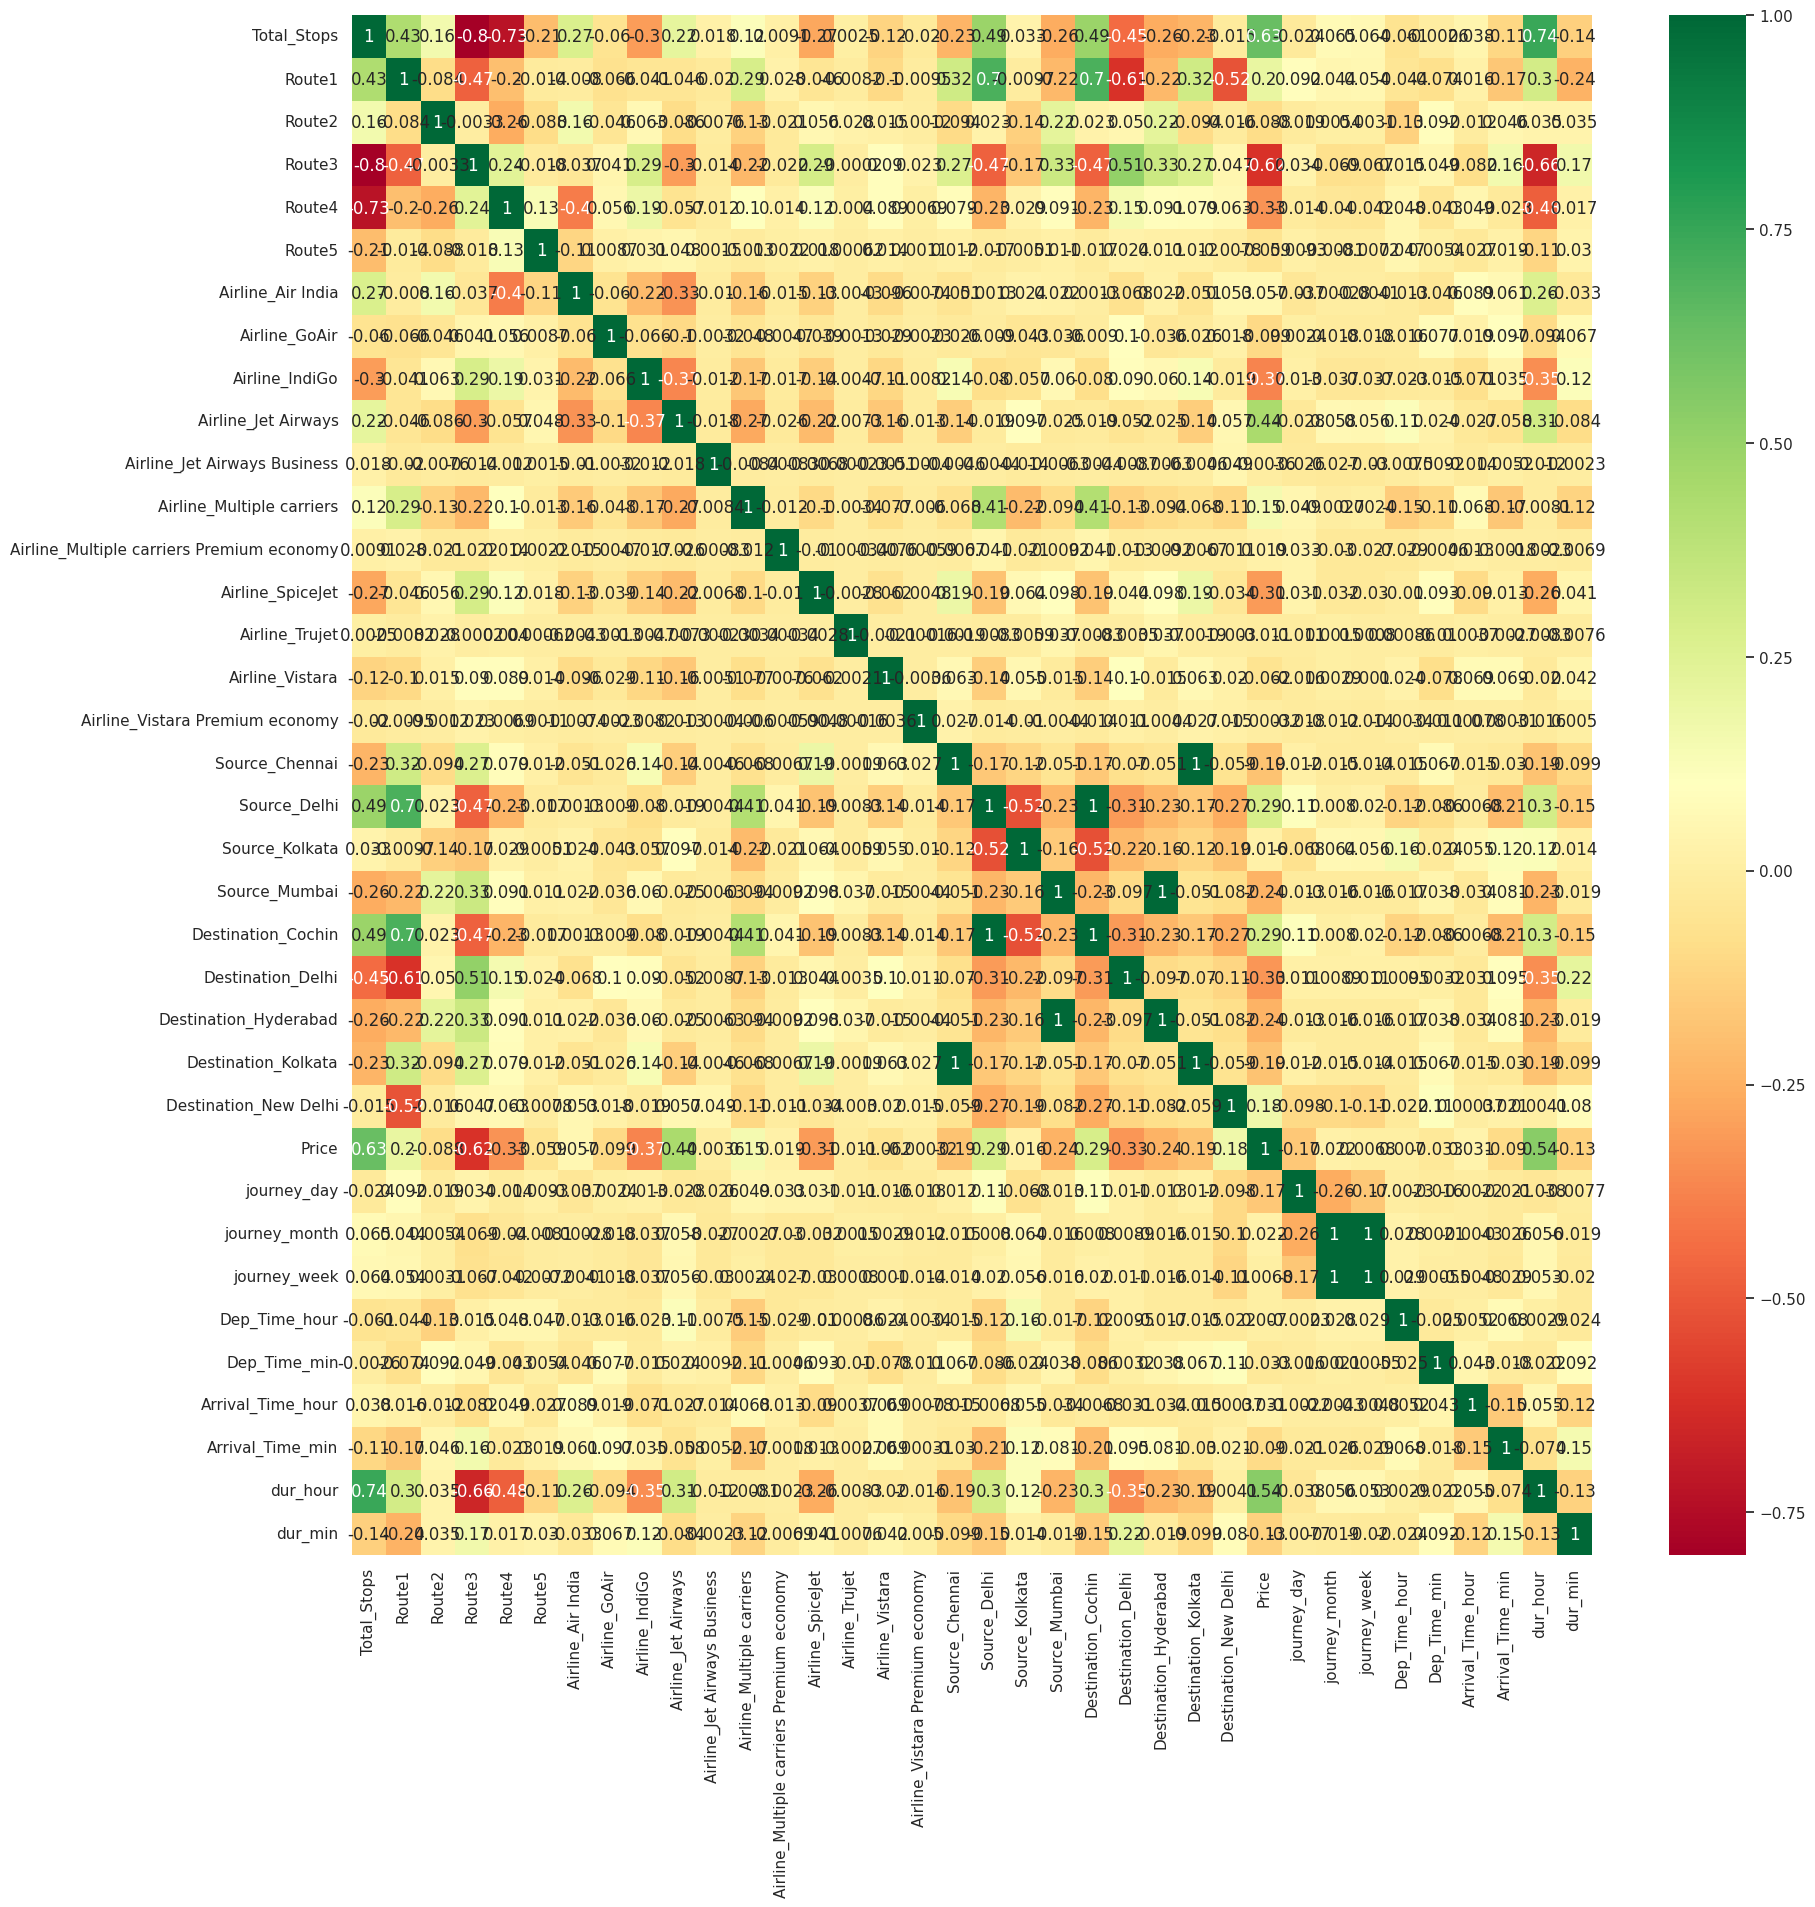

In [238]:
plt.figure(figsize = (20,20))
sns.heatmap(dff.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [239]:
# Important Feature using ExtraTreeRegression

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [240]:
selection.feature_importances_

array([1.69522795e-01, 9.19492528e-03, 2.31391152e-02, 2.43492415e-01,
       2.35730528e-02, 4.27658128e-04, 8.62073647e-03, 1.16761464e-03,
       1.65279505e-02, 9.91120542e-02, 4.29527278e-04, 2.65367863e-02,
       1.12874272e-03, 2.58543786e-03, 1.29102982e-04, 5.85455231e-03,
       1.56855817e-04, 5.48140442e-04, 2.03048401e-03, 3.17350733e-03,
       3.28505550e-03, 1.97680678e-03, 4.79068410e-04, 4.07810735e-03,
       5.60684290e-04, 1.45482834e-02, 1.08683873e-01, 4.73097369e-02,
       5.26844678e-02, 1.92881325e-02, 1.91768817e-02, 1.70450026e-02,
       1.63968169e-02, 4.41701847e-02, 1.29654439e-02])

In [241]:
# plot graph of feature importance for better visualization

plt.figure(figsize = (20,20))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)


<Figure size 2000x2000 with 0 Axes>

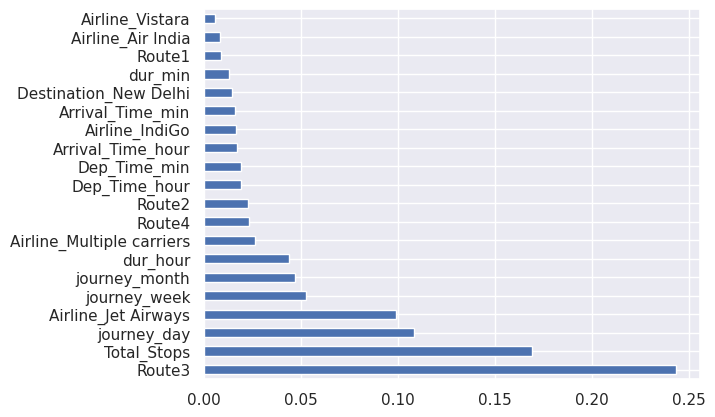

In [242]:
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
X.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'journey_day',
       'journey_month', 'journey_week', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

In [245]:
for i in X.columns:
  X[i]=X[i].astype('float64')

In [246]:
X.dtypes

Total_Stops                                  float64
Route1                                       float64
Route2                                       float64
Route3                                       float64
Route4                                       float64
Route5                                       float64
Airline_Air India                            float64
Airline_GoAir                                float64
Airline_IndiGo                               float64
Airline_Jet Airways                          float64
Airline_Jet Airways Business                 float64
Airline_Multiple carriers                    float64
Airline_Multiple carriers Premium economy    float64
Airline_SpiceJet                             float64
Airline_Trujet                               float64
Airline_Vistara                              float64
Airline_Vistara Premium economy              float64
Source_Chennai                               float64
Source_Delhi                                 f

In [247]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif
0,Total_Stops,42.919362
1,Route1,inf
2,Route2,1.324471
3,Route3,20.564295
4,Route4,13.716001
5,Route5,1.919895
6,Airline_Air India,6.261030
7,Airline_GoAir,1.613572
8,Airline_IndiGo,6.369882
9,Airline_Jet Airways,9.335421


In [248]:
vif_data['vif'].sort_values(ascending = False)

17            inf
1             inf
24            inf
23            inf
21            inf
20            inf
19            inf
18            inf
27    2808.443025
28    2691.003188
22     338.310593
25     258.762718
0       42.919362
26      26.779063
3       20.564295
4       13.716001
9        9.335421
8        6.369882
6        6.261030
11       4.940143
13       3.488506
33       2.654507
15       2.577966
5        1.919895
7        1.613572
2        1.324471
34       1.151827
32       1.139368
30       1.119435
31       1.093818
29       1.075889
12       1.050321
10       1.026736
16       1.012656
14       1.007713
Name: vif, dtype: float64

In [249]:
X.drop(columns = 'Destination_Hyderabad',axis = 1,inplace = True)

In [250]:
X.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Kolkata',
       'Destination_New Delhi', 'journey_day', 'journey_month', 'journey_week',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

In [251]:
vif_data_1 = pd.DataFrame()
vif_data_1["feature"] = X.columns
vif_data_1['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_1

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif
0,Total_Stops,42.919362
1,Route1,inf
2,Route2,1.324471
3,Route3,20.564295
4,Route4,13.716001
5,Route5,1.919895
6,Airline_Air India,6.261030
7,Airline_GoAir,1.613572
8,Airline_IndiGo,6.369882
9,Airline_Jet Airways,9.335421


In [252]:
vif_data_1['vif'].sort_values(ascending = False)

17            inf
1             inf
23            inf
21            inf
20            inf
19            inf
18            inf
26    2808.443025
27    2691.003188
22     338.310593
24     258.762718
0       42.919362
25      26.779063
3       20.564295
4       13.716001
9        9.335421
8        6.369882
6        6.261030
11       4.940143
13       3.488506
32       2.654507
15       2.577966
5        1.919895
7        1.613572
2        1.324471
33       1.151827
31       1.139368
29       1.119435
30       1.093818
28       1.075889
12       1.050321
10       1.026736
16       1.012656
14       1.007713
Name: vif, dtype: float64

In [257]:
X.drop(columns = 'Source_Chennai',axis = 1,inplace = True)

In [258]:
vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = X.columns
vif_data_2['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_2['vif'].sort_values(ascending = False)

1     3889.005166
23    2808.443025
24    2691.003188
19     338.310593
18     288.080687
21     258.762718
20     101.351209
17      50.324416
0       42.919362
22      26.779063
3       20.564295
4       13.716001
9        9.335421
8        6.369882
6        6.261030
11       4.940143
13       3.488506
29       2.654507
15       2.577966
5        1.919895
7        1.613572
2        1.324471
30       1.151827
28       1.139368
26       1.119435
27       1.093818
25       1.075889
12       1.050321
10       1.026736
16       1.012656
14       1.007713
Name: vif, dtype: float64

In [259]:
vif_data_2

,feature,vif
0,Total_Stops,42.919362
1,Route1,3889.005166
2,Route2,1.324471
3,Route3,20.564295
4,Route4,13.716001
5,Route5,1.919895
6,Airline_Air India,6.261030
7,Airline_GoAir,1.613572
8,Airline_IndiGo,6.369882
9,Airline_Jet Airways,9.335421


In [260]:
X.drop(columns = 'Route1',axis = 1,inplace = True)

In [261]:
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = X.columns
vif_data_3['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_3['vif'].sort_values(ascending = False)

22    10494.777480
23     8964.195446
4       196.914408
3        70.017996
21       68.990018
0        29.820544
2        15.945182
8        14.344190
7         7.804192
5         7.400062
28        6.511761
24        6.117116
10        5.522073
26        5.236607
29        4.350844
1         4.222762
12        3.740011
27        3.686991
17        3.672159
25        3.013130
14        2.675572
18        2.496543
16        1.861927
6         1.634337
20        1.579920
19        1.431458
11        1.051288
9         1.026553
15        1.012574
13        1.007667
Name: vif, dtype: float64

In [262]:
vif_data_3

,feature,vif
0,Total_Stops,29.820544
1,Route2,4.222762
2,Route3,15.945182
3,Route4,70.017996
4,Route5,196.914408
5,Airline_Air India,7.400062
6,Airline_GoAir,1.634337
7,Airline_IndiGo,7.804192
8,Airline_Jet Airways,14.344190
9,Airline_Jet Airways Business,1.026553


In [263]:
X.drop(columns = 'journey_month',axis = 1,inplace = True)

In [264]:
vif_data_4 = pd.DataFrame()
vif_data_4["feature"] = X.columns
vif_data_4['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_4['vif'].sort_values(ascending = False)

4     139.419241
3      54.860571
0      22.803901
8      14.290454
2      12.697818
7       7.788312
5       7.379977
27      6.511732
23      6.115745
10      5.509225
25      5.236436
28      4.334944
1       4.186376
22      4.181235
12      3.736027
26      3.686982
17      3.563490
21      3.270097
24      3.012950
14      2.669182
18      2.462885
16      1.821951
6       1.630884
20      1.518071
19      1.428528
11      1.050888
9       1.026552
15      1.012501
13      1.007361
Name: vif, dtype: float64

In [265]:
vif_data_4

,feature,vif
0,Total_Stops,22.803901
1,Route2,4.186376
2,Route3,12.697818
3,Route4,54.860571
4,Route5,139.419241
5,Airline_Air India,7.379977
6,Airline_GoAir,1.630884
7,Airline_IndiGo,7.788312
8,Airline_Jet Airways,14.290454
9,Airline_Jet Airways Business,1.026552


In [266]:
X.drop(columns = 'Route5',axis = 1,inplace = True)

In [267]:
vif_data_5 = pd.DataFrame()
vif_data_5["feature"] = X.columns
vif_data_5['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_5['vif'].sort_values(ascending = False)

3     24.799373
0     15.186081
7     13.252938
2      9.376963
6      7.367670
4      6.956806
26     6.509771
22     5.992049
9      5.289745
24     5.225019
27     4.258273
1      4.170658
21     4.152106
25     3.639951
16     3.559467
11     3.557507
20     3.240423
23     2.985931
13     2.564678
17     2.462694
15     1.818032
5      1.597628
19     1.503988
18     1.427566
10     1.048403
8      1.023979
14     1.011493
12     1.007265
Name: vif, dtype: float64

In [268]:
vif_data_5

,feature,vif
0,Total_Stops,15.186081
1,Route2,4.170658
2,Route3,9.376963
3,Route4,24.799373
4,Airline_Air India,6.956806
5,Airline_GoAir,1.597628
6,Airline_IndiGo,7.367670
7,Airline_Jet Airways,13.252938
8,Airline_Jet Airways Business,1.023979
9,Airline_Multiple carriers,5.289745


In [269]:
X.drop(columns = 'Route4',axis = 1,inplace = True)

In [270]:
vif_data_6 = pd.DataFrame()
vif_data_6["feature"] = X.columns
vif_data_6['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_6['vif'].sort_values(ascending = False)

0     10.936556
2      9.142307
6      8.402742
25     6.408425
21     5.547956
3      5.373489
23     4.810337
5      4.789042
1      4.160346
26     4.124083
20     3.969664
24     3.506416
15     3.460514
8      3.271789
19     3.177623
22     2.893637
10     2.584681
16     2.459737
12     1.999967
14     1.817949
18     1.468146
17     1.427481
4      1.376569
9      1.026204
7      1.014145
13     1.007663
11     1.004806
Name: vif, dtype: float64

In [271]:
vif_data_6

,feature,vif
0,Total_Stops,10.936556
1,Route2,4.160346
2,Route3,9.142307
3,Airline_Air India,5.373489
4,Airline_GoAir,1.376569
5,Airline_IndiGo,4.789042
6,Airline_Jet Airways,8.402742
7,Airline_Jet Airways Business,1.014145
8,Airline_Multiple carriers,3.271789
9,Airline_Multiple carriers Premium economy,1.026204


In [272]:
X.drop(columns = 'Total_Stops',axis = 1,inplace = True)

In [273]:
vif_data_7 = pd.DataFrame()
vif_data_7["feature"] = X.columns
vif_data_7['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_7['vif'].sort_values(ascending = False)

5     7.909176
1     7.396558
20    5.541140
24    5.196229
2     4.814818
22    4.809666
4     4.625471
25    4.098801
19    3.932139
0     3.842695
23    3.477174
14    3.195175
18    3.168784
7     3.138877
21    2.851966
9     2.524034
15    2.443992
11    1.977618
13    1.808770
17    1.462260
16    1.427476
3     1.357997
8     1.024999
6     1.010052
12    1.007356
10    1.004301
Name: vif, dtype: float64

In [274]:
vif_data_7

,feature,vif
0,Route2,3.842695
1,Route3,7.396558
2,Airline_Air India,4.814818
3,Airline_GoAir,1.357997
4,Airline_IndiGo,4.625471
5,Airline_Jet Airways,7.909176
6,Airline_Jet Airways Business,1.010052
7,Airline_Multiple carriers,3.138877
8,Airline_Multiple carriers Premium economy,1.024999
9,Airline_SpiceJet,2.524034


In [275]:
X.drop(columns = 'Airline_Jet Airways',axis = 1,inplace = True)

In [276]:
vif_data_8 = pd.DataFrame()
vif_data_8["feature"] = X.columns
vif_data_8['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_8['vif'].sort_values(ascending = False)

1     7.235280
19    5.057688
21    4.417443
23    4.304089
24    4.023220
0     3.744498
18    3.703082
22    3.414511
17    3.076495
13    3.065559
20    2.850835
14    2.424698
4     1.941607
12    1.775923
2     1.606447
6     1.584283
8     1.530663
15    1.410901
16    1.408459
10    1.200962
3     1.102155
7     1.009078
5     1.004957
11    1.003768
9     1.002733
Name: vif, dtype: float64

In [277]:
vif_data_7

,feature,vif
0,Route2,3.842695
1,Route3,7.396558
2,Airline_Air India,4.814818
3,Airline_GoAir,1.357997
4,Airline_IndiGo,4.625471
5,Airline_Jet Airways,7.909176
6,Airline_Jet Airways Business,1.010052
7,Airline_Multiple carriers,3.138877
8,Airline_Multiple carriers Premium economy,1.024999
9,Airline_SpiceJet,2.524034


In [278]:
X.drop(columns = 'Route3',axis = 1,inplace = True)

In [279]:
vif_data_8 = pd.DataFrame()
vif_data_8["feature"] = X.columns
vif_data_8['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data_8['vif'].sort_values(ascending = False)

18    4.901543
20    4.366469
23    3.962778
22    3.882872
0     3.702643
17    3.665608
21    3.304090
12    3.060571
16    2.999251
19    2.836558
3     1.781440
13    1.649512
5     1.582690
1     1.516072
11    1.399924
7     1.387005
15    1.313723
14    1.235352
9     1.183194
2     1.102057
6     1.009070
4     1.004840
10    1.003090
8     1.002650
Name: vif, dtype: float64

In [281]:
X

,Route2,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Kolkata,Destination_New Delhi,journey_day,journey_week,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,24.0,12.0,22.0,20.0,1.0,10.0,2.0,50.0
1,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,5.0,50.0,13.0,15.0,7.0,25.0
2,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,36.0,9.0,25.0,4.0,25.0,19.0,0.0
3,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,49.0,18.0,5.0,23.0,30.0,5.0,25.0
4,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,16.0,50.0,21.0,35.0,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,36.0,19.0,55.0,22.0,25.0,2.0,30.0
10679,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,17.0,20.0,45.0,23.0,20.0,2.0,35.0
10680,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,17.0,8.0,20.0,11.0,20.0,3.0,0.0
10681,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,3.0,1.0,11.0,30.0,14.0,10.0,2.0,40.0


# Model

In [282]:
#spliting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [283]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def model_training(ml_model):
    print('model is: {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("prediction are : {}".format(predictions))
    print("\n")
    r2score = r2_score(y_test,predictions)
    print("r2 score is :{}".format(r2score))
    print("MAE :{}".format(mean_absolute_error(y_test,predictions)))
    print("MSE : {}".format(mean_squared_error(y_test,predictions)))
    print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
    sns.displot(y_test-predictions)
    

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

model is: RandomForestRegressor()
Training score: 0.9509702374627274
prediction are : [ 8329.85283333 16933.95       14042.75166667 ...  3887.64
  5507.41       10966.83333333]


r2 score is :0.8303088800480295
MAE :1117.722187843236
MSE : 3040517.584503496
RMSE : 1743.7079986349481


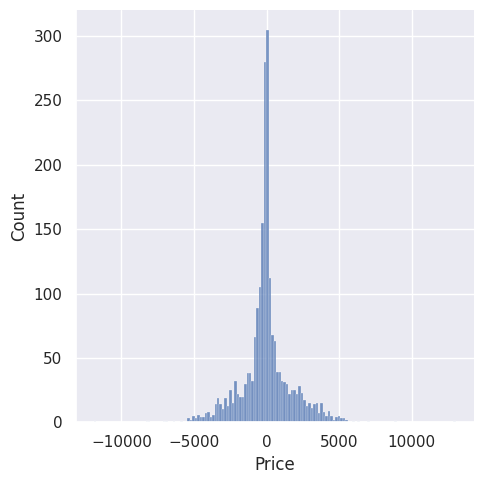

In [285]:
model_training(RandomForestRegressor())

model is: LogisticRegression()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.2520772381509655
prediction are : [ 9899. 15237. 10844. ...  7229.  6147. 12681.]


r2 score is :0.15207404626843923
MAE :2388.051941974731
MSE : 15193097.74964904
RMSE : 3897.832442479928


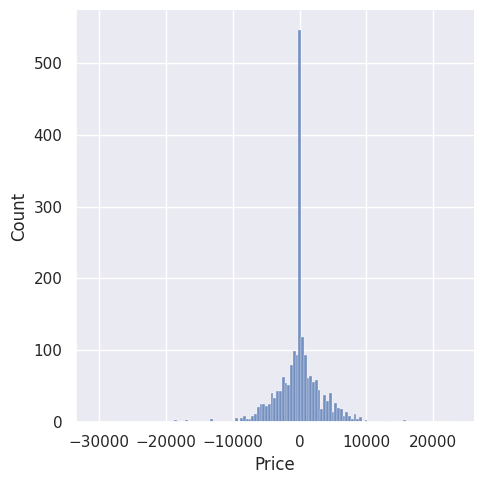

In [288]:
model_training(LogisticRegression())

model is: KNeighborsRegressor()
Training score: 0.7077485379530841
prediction are : [ 7124.  12277.6 12767.2 ...  3134.  10775.8 11109.2]


r2 score is :0.5441516822955275
MAE :1976.4492278895648
MSE : 8167868.927019186
RMSE : 2857.948377248824


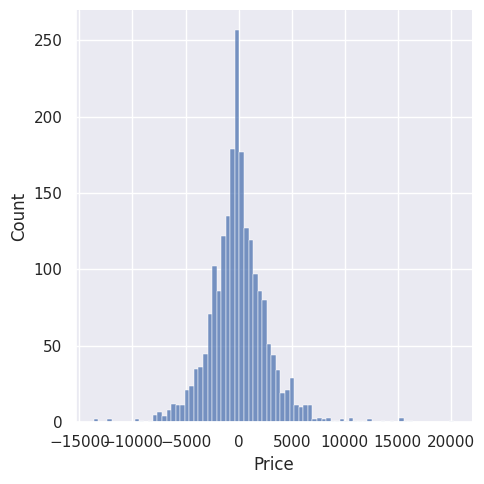

In [289]:
model_training(KNeighborsRegressor())

model is: DecisionTreeRegressor()
Training score: 0.9667772510524137
prediction are : [ 8996. 18550. 14571. ...  3943.  5054. 10262.]


r2 score is :0.6679679113944588
MAE :1348.7183746685387
MSE : 5949335.50035096
RMSE : 2439.1259705785924


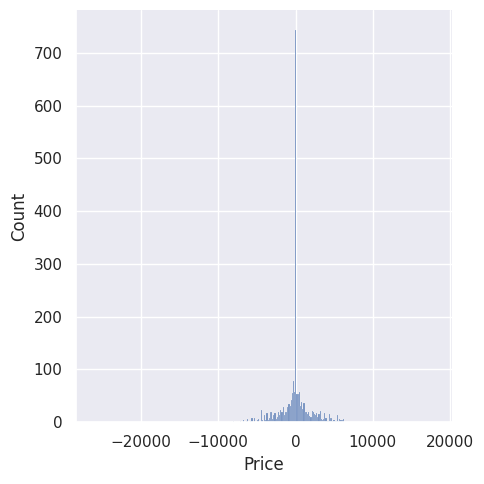

In [290]:
model_training(DecisionTreeRegressor())

model is: SVR()
Training score: 0.002348207813785197
prediction are : [8471.86231126 8198.87744368 8378.30146909 ... 8148.53325124 8461.9181443
 8405.69539376]


r2 score is :0.013117697576501941
MAE :3411.7377225996784
MSE : 17682911.134084355
RMSE : 4205.105365396253


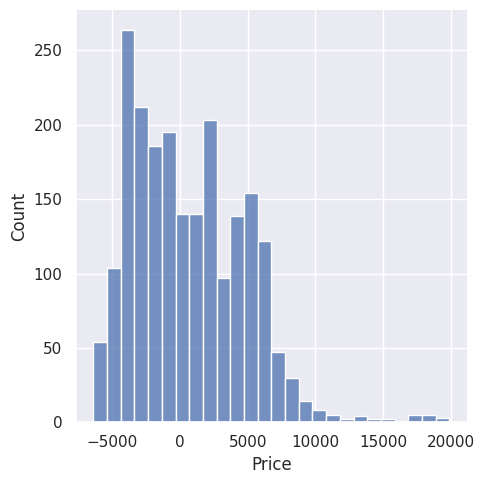

In [291]:
model_training(SVR())

model is: GradientBoostingRegressor()
Training score: 0.7559580150436153
prediction are : [ 6528.96389553 16475.04140836 11161.60912537 ...  4887.96679909
  6480.55127233 11707.59630276]


r2 score is :0.7642366631367137
MAE :1546.761700124668
MSE : 4224396.490028112
RMSE : 2055.333668781814


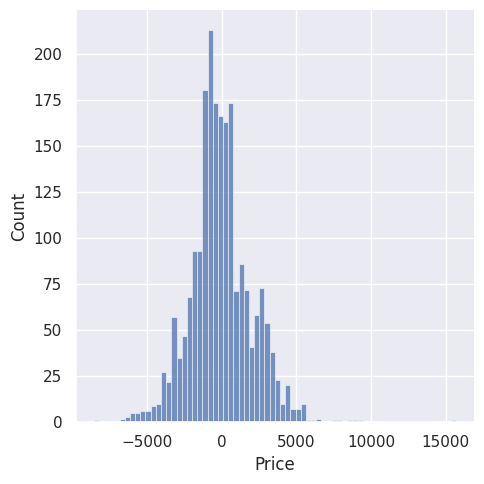

In [292]:
model_training(GradientBoostingRegressor())

model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.9289521540541241
prediction are : [ 8765.011  17020.059  12770.022  ...  3980.7063  5963.1494 11716.903 ]


r2 score is :0.8698964145513498
MAE :1076.3661028621461
MSE : 2331189.984929913
RMSE : 1526.8234950150306


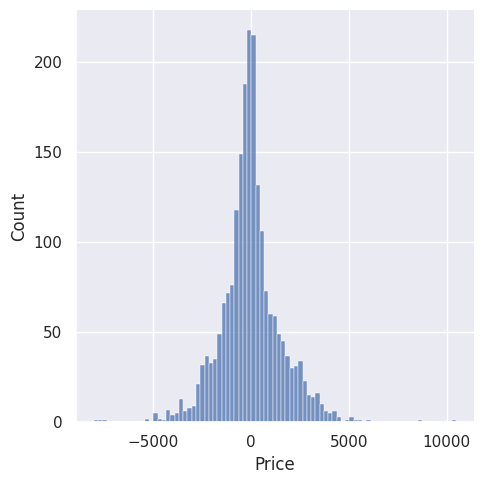

In [293]:
model_training(XGBRegressor())

In [294]:
### Hyperparameter

In [295]:
from sklearn.model_selection import RandomizedSearchCV

In [296]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [298]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [300]:
print("Best parameters:", clf.best_params_)

Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.4}


model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=None,
             colsample_bytree=0.8999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.9123796381753604
prediction are : [ 8415.743  17278.414  12909.199  ...  3964.6338  5647.4585 11289.108 ]


r2 score is :0.8650125985179374
MAE :1111.9014145418703
MSE : 2418697.973169211
RMSE : 1555.216375032494


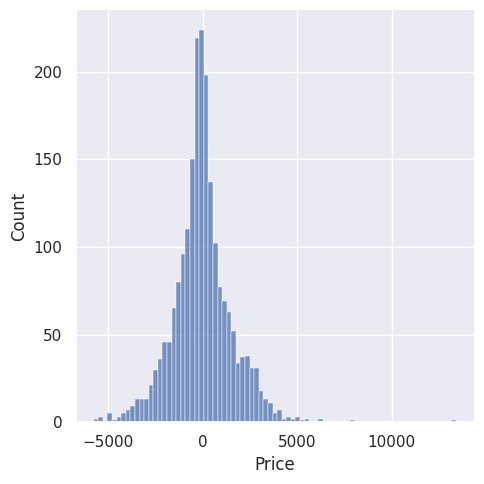

In [306]:
model_training(XGBRegressor(subsample= 0.7999999999999999,n_estimators= 500,max_depth=5,learning_rate= 0.1, colsample_bytree= 0.8999999999999999,colsample_bylevel= 0.4))